Preparation of data, the images are saved into with in there respective directories.

In [ ]:
# Download apple
from bing_image_downloader import downloader

downloader.download(query="apple",limit=20,output_dir="fruits_train/images")

In [ ]:
# Download banana
from bing_image_downloader import downloader

downloader.download(query="banana",limit=20,output_dir="fruits_train/images")

In [ ]:
# Download guava
from bing_image_downloader import downloader

downloader.download(query="guava",limit=20,output_dir="fruits_train/images")

~ Checking image count and sample.

In [24]:
import os
import glob

In [25]:
# Below are the directories
apple_path = "images/apple"
banana_path = "images/banana"
guava_path = "images/guava"

directories = [apple_path, banana_path, guava_path]
items = ['apple', 'banana', 'guava']
i=0

for directory in directories: 
    
    file_list = os.listdir(directory)
    file_list.remove('.ipynb_checkpoints') # Avoid index '0' it is an '.ipynb_checkpoints'
    
    print(f"Number of {items[i]}'s images - ", len(file_list), " => ", file_list[0:2]) # Shows bit sample
    
    i+=1

Number of apple's images -  20  =>  ['Image_1.jpg', 'Image_10.jpg']
Number of banana's images -  20  =>  ['Image_1.jpg', 'Image_10.jpg']
Number of guava's images -  20  =>  ['Image_1.jpg', 'Image_10.jpg']


> Data exploration and Manipulation setup...

In [26]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [27]:
# Manipulating the size of images and displaying images

def show(directory_of_fruits, index=1, size=32, s_limit=(1, 256), figsize=(5,5), return_array= False ):
    
    if (size > 0) and (size <= 256):
        
        images_list = os.listdir(directory_of_fruits)
        
        if images_list[0] == ".ipynb_checkpoints":
            images_list.remove(".ipynb_checkpoints") # Avoid index '0' it is an '.ipynb_checkpoints'

        img = Image.open( os.path.join( directory_of_fruits, images_list[index] ) )
        img = img.resize( (size,size) )
        array = np.asarray( img )
        
        if return_array!= True:
            plt.figure(figsize = figsize)
            plt.imshow(array)
            
            return
        
        else:
            return array
        
    else:
           raise Exception(f"Violating the size, limit must in between ({s_limit[0]}, {s_limit[1]})")
            

~ Delineating the data.

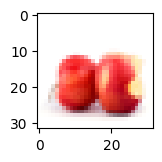

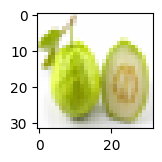

In [28]:
show( apple_path, index = 7, size=32, figsize = (1.5,1.5) )
show( guava_path, index = 0, size=32, figsize = (1.5,1.5) )

~ Lets get an array of an image by specifying -> ' return_array = True '

In [29]:
show( apple_path, 7, size=32, figsize = (1.5,1.5), return_array=True ).shape #Checking the shape of an array

(32, 32, 3)

>Data augmentation..

~ The module augmentor raising an error abruptly Not often that sacking process in middle but it is going to download
some images. Run the cell even an error check the size of folder using 'OS module' till you get desired size of images .


~ Checking the number of images after data augmentation using Augmentor in the output directory.

In [30]:

a_path = 'images/output/apple' 
b_path = 'images/output/banana'
g_path = 'images/output/guava'

items_ = ["Apple","Banana","Guava"]
paths  = [a_path,b_path,g_path]
i=0

for j in paths:
    temp = os.listdir(j)
    
    # Avoid the .ipynb_checkpoints if it is presents in your list.
    
    if temp[0] == ".ipynb_checkpoints":
        temp.remove(".ipynb_checkpoints") 
        
    print( items_[i]," => ",len(temp) )
    
    i -=- 1
    

Apple  =>  428
Banana  =>  423
Guava  =>  447


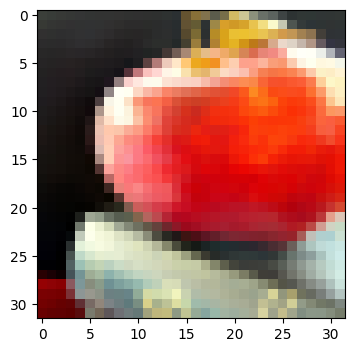

In [31]:
show( a_path, 407, size=32, figsize = (4,4) )

>Converting & Combining

~ Converting all the images available in output folder into an array and combining them as a 4d array( Data set ).

In [66]:
def get_arrays_of_folder(folder_path):
    
    arrays = []
    
    for i in range(len( os.listdir(folder_path) ) ):
        
        arrays.append(show(folder_path, i, size=32, figsize = (4,4), return_array=True))
        
    print( len_ := len(arrays))
    return np.stack(arrays) , len_

# This function prints length of array and aslo returns the arrays of all images in given path.

~ Creating the X data.

In [67]:
apples_array , apples_len = get_arrays_of_folder(a_path)

428


In [70]:
bananas_array , bananas_len = get_arrays_of_folder(b_path)

423


In [71]:
guavas_array , guavas_len = get_arrays_of_folder(g_path)

447


~ Creating the Y data lables for above arrays.

In [78]:
apples_lable = np.array([0] * apples_len)

bananas_lable = np.array([1] * bananas_len)

guavas_lable = np.array([2] * guavas_len)

~ Combinimg all the X data and Y data.

In [99]:
x_data = np.concatenate([apples_array, bananas_array, guavas_array])
y_data = np.concatenate([apples_lable, bananas_lable, guavas_lable])

~ Lets save our data as two files that is X & Y.

In [121]:
np.save('X_data',x_data)

np.save('Y_data',y_data)

~ Load them for to test is it working ?

1 



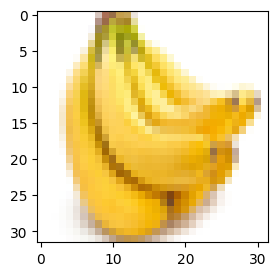

In [134]:
X = np.load("X_data.npy")
Y = np.load("Y_data.npy")

index_ = 428

plt.figure(figsize=(3,3))
plt.imshow(X[ index_ ])
print(Y[ index_ ],'\n')

>>> The Data preparation is accomplished .